# Load Dataset

In [1]:
import gdown
# SIBI datasets : https://drive.google.com/file/d/1S3qe0CUb0Ti5ijmquScydP8s67Gu31Zv/view?usp=sharing
!gdown 1S3qe0CUb0Ti5ijmquScydP8s67Gu31Zv

Downloading...
From (original): https://drive.google.com/uc?id=1S3qe0CUb0Ti5ijmquScydP8s67Gu31Zv
From (redirected): https://drive.google.com/uc?id=1S3qe0CUb0Ti5ijmquScydP8s67Gu31Zv&confirm=t&uuid=49da6989-a485-439d-910b-279defe5aebd
To: /kaggle/working/SIBI_datasets.zip
100%|████████████████████████████████████████| 780M/780M [00:10<00:00, 73.4MB/s]


In [2]:
!unzip SIBI_datasets.zip

Archive:  SIBI_datasets.zip
   creating: SIBI_datasets/
   creating: SIBI_datasets/val/
   creating: SIBI_datasets/val/U/
  inflating: SIBI_datasets/val/U/2871.jpg  
  inflating: SIBI_datasets/val/U/2555.jpg  
  inflating: SIBI_datasets/val/U/U2579.jpg  
  inflating: SIBI_datasets/val/U/U2807.jpg  
  inflating: SIBI_datasets/val/U/U2395.jpg  
  inflating: SIBI_datasets/val/U/590.jpg  
  inflating: SIBI_datasets/val/U/U1446.jpg  
  inflating: SIBI_datasets/val/U/U884.jpg  
  inflating: SIBI_datasets/val/U/2455.jpg  
  inflating: SIBI_datasets/val/U/U774.jpg  
  inflating: SIBI_datasets/val/U/U2062.jpg  
  inflating: SIBI_datasets/val/U/U208.jpg  
  inflating: SIBI_datasets/val/U/U1617.jpg  
  inflating: SIBI_datasets/val/U/2385.jpg  
  inflating: SIBI_datasets/val/U/U190.jpg  
  inflating: SIBI_datasets/val/U/U107.jpg  
  inflating: SIBI_datasets/val/U/2966.jpg  
  inflating: SIBI_datasets/val/U/U289.jpg  
  inflating: SIBI_datasets/val/U/U1612.jpg  
  inflating: SIBI_datasets/val/U/U25

In [3]:
!rm /kaggle/working/SIBI_datasets.zip

# Import Dataset

In [4]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report


2025-05-29 05:16:06.942776: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748495767.174016      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748495767.245337      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Split Data

In [5]:
data_dir = '/kaggle/working/SIBI_datasets'

data = []
split_folders = ([name for name in os.listdir(data_dir)])

for split in split_folders:
    alphabets = sorted(os.listdir(os.path.join(data_dir, split)))
    for alphabet in alphabets:
        img_files = os.listdir(os.path.join(data_dir,split,alphabet))
        num_imgs = len(img_files)
        data.append({'Folder': split, 'Alfabet': alphabet, 'Jumlah': num_imgs})
df = pd.DataFrame(data)

x = df.pivot(index='Alfabet', columns='Folder', values='Jumlah').reset_index()
x.columns.name = None
print(x.columns)
print(x)

Index(['Alfabet', 'test', 'train', 'val'], dtype='object')
   Alfabet  test  train  val
0        A   100    800  100
1        B   100    800  100
2        C   100    800  100
3        D   100    800  100
4        E   100    800  100
5        F   100    800  100
6        G   100    800  100
7        H   100    800  100
8        I   100    800  100
9        J   100    800  100
10       K   100    800  100
11       L   100    800  100
12       M   100    800  100
13       N   100    800  100
14       O   100    800  100
15       P   100    800  100
16       Q   100    800  100
17       R   100    800  100
18       S   100    800  100
19       T   100    800  100
20       U   100    800  100
21       V   100    800  100
22       W   100    800  100
23       X   100    800  100
24       Y   100    800  100
25       Z   100    800  100


In [6]:
# Mengelompokkan data untuk melihat jumlah gambar pada setiap folder
groupby_df = df.groupby('Folder').agg({'Jumlah': 'sum'}).reset_index()

print(groupby_df)
print(f"\nTotal gambar: {groupby_df['Jumlah'].sum()}")

  Folder  Jumlah
0   test    2600
1  train   20800
2    val    2600

Total gambar: 26000


# Preprocessing

In [7]:
# Load Dataset
image_size = (224, 224)
batch_size = 32

train_dir = data_dir +'/train/'
val_dir = data_dir +'/val/'
test_dir = data_dir +'/test/'

train_data = tf.keras.utils.image_dataset_from_directory(directory=train_dir,
                                                  label_mode='categorical',
                                                  image_size=image_size,
                                                  batch_size=batch_size,
                                                  shuffle=True,
                                                  seed=42)


val_data = tf.keras.utils.image_dataset_from_directory(directory=val_dir,
                                                        label_mode='categorical',
                                                        image_size=image_size,
                                                        batch_size=batch_size,
                                                        shuffle=False)

test_data = tf.keras.utils.image_dataset_from_directory(directory=test_dir,
                                                        label_mode='categorical',
                                                        image_size=image_size,
                                                        batch_size=batch_size,
                                                        shuffle=False)


num_classes = len(train_data.class_names)
class_names = train_data.class_names

print(f"\nClasses {num_classes}: {class_names}")

train_data = train_data.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
val_data = val_data.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_data = test_data.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

Found 20800 files belonging to 26 classes.


I0000 00:00:1748495794.573723      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1748495794.574644      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Found 2600 files belonging to 26 classes.
Found 2600 files belonging to 26 classes.

Classes 26: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [8]:
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.Resizing(256, 256),
    tf.keras.layers.RandomCrop(224, 224),
    tf.keras.layers.RandomRotation(0.028),  
    tf.keras.layers.RandomTranslation(0.1, 0.1),
    tf.keras.layers.RandomBrightness(0.3),  
    tf.keras.layers.RandomContrast(0.3),    
   
])

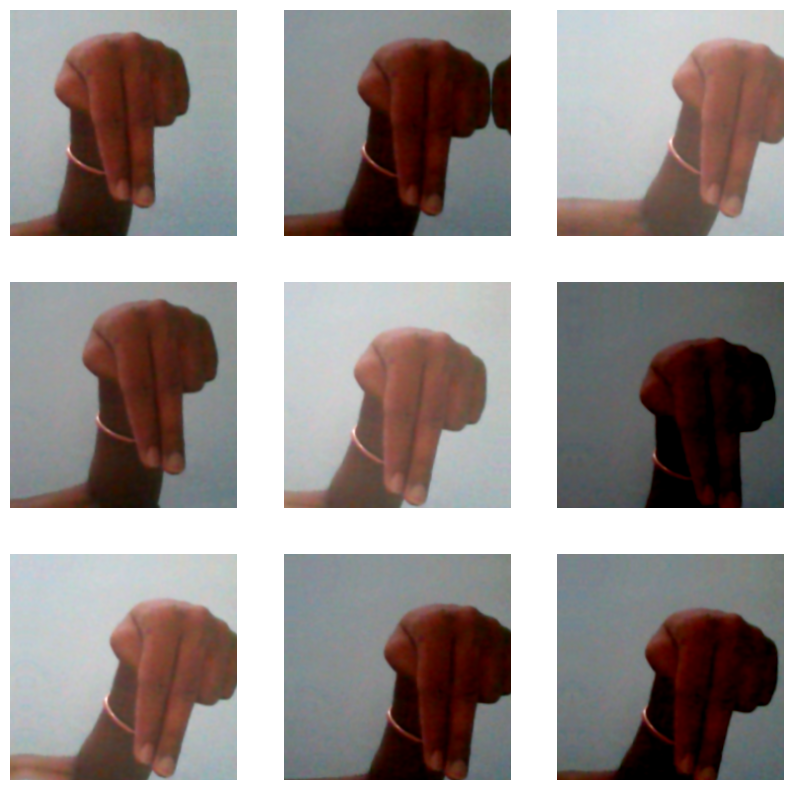

In [9]:
for image, _ in train_data.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

In [10]:
# Optional: cek bentuk batch
for image_batch, labels_batch in train_data.take(1):
    print(image_batch.shape)  # Harus (32, 224, 224, 3)
    print(labels_batch.shape)  # Harus (32, num_classes)
    break

(32, 224, 224, 3)
(32, 26)


# Model CNN Biasa

In [16]:
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ===== 1. Build Model =====
cnn_model = tf.keras.Sequential([
              tf.keras.Input(shape=(224, 224, 3)),
              tf.keras.layers.Rescaling(1./255),
              tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
              tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
              tf.keras.layers.MaxPooling2D(),
              tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
              tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
              tf.keras.layers.MaxPooling2D(),
              tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
              tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
              tf.keras.layers.MaxPooling2D(),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(128, activation='relu'),
              tf.keras.layers.Dense(num_classes, activation='softmax')
            ])
cnn_model.summary()

# ===== 2. Compile Model =====
cnn_model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# ===== 3. Callbacks =====
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, verbose=1)

# ===== 4. Train Model =====
cnn_history = cnn_model.fit(
    train_data,
    validation_data=val_data,
    epochs=20,
    callbacks=[early_stop, reduce_lr]
)



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 224, 224, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 112, 112, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 56, 56, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │      12,845,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 26)                  │           3,354 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,135,546 (50.11 MB)

 Trainable params: 13,135,546 (50.11 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20


2025-05-28 13:38:58.427832: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[32,32,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,32,224,224]{3,2,1,0}, f32[32,32,224,224]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]} is taking a while...
2025-05-28 13:39:00.148316: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 2.720590976s
Trying algorithm eng0{} for conv (f32[32,32,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,32,224,224]{3,2,1,0}, f32[32,32,224,224]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"cudnn_conv_backend_config":{"act

650/650 ━━━━━━━━━━━━━━━━━━━━ 124s 158ms/step - accuracy: 0.3231 - loss: 2.2878 - val_accuracy: 0.8535 - val_loss: 0.4679 - learning_rate: 1.0000e-04
Epoch 2/20
650/650 ━━━━━━━━━━━━━━━━━━━━ 95s 147ms/step - accuracy: 0.9008 - loss: 0.3300 - val_accuracy: 0.9504 - val_loss: 0.1716 - learning_rate: 1.0000e-04
Epoch 3/20
650/650 ━━━━━━━━━━━━━━━━━━━━ 95s 147ms/step - accuracy: 0.9672 - loss: 0.1178 - val_accuracy: 0.9665 - val_loss: 0.1033 - learning_rate: 1.0000e-04
Epoch 4/20
650/650 ━━━━━━━━━━━━━━━━━━━━ 95s 147ms/step - accuracy: 0.9835 - loss: 0.0591 - val_accuracy: 0.9854 - val_loss: 0.0552 - learning_rate: 1.0000e-04
Epoch 5/20
650/650 ━━━━━━━━━━━━━━━━━━━━ 95s 147ms/step - accuracy: 0.9884 - loss: 0.0392 - val_accuracy: 0.9165 - val_loss: 0.2740 - learning_rate: 1.0000e-04
Epoch 6/20
650/650 ━━━━━━━━━━━━━━━━━━━━ 95s 147ms/step - accuracy: 0.9838 - loss: 0.0502 - val_accuracy: 0.9873 - val_loss: 0.0546 - learning_rate: 1.0000e-04
Epoch 7/20
650/650 ━━━━━━━━━━━━━━━━━━━━ 95s 147ms/step -

82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.9956 - loss: 0.0328

✅ CNN Test Accuracy: 0.9954
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━

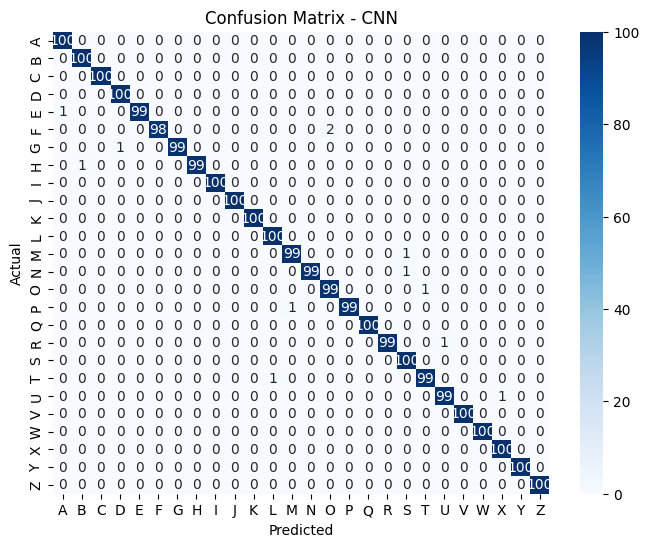

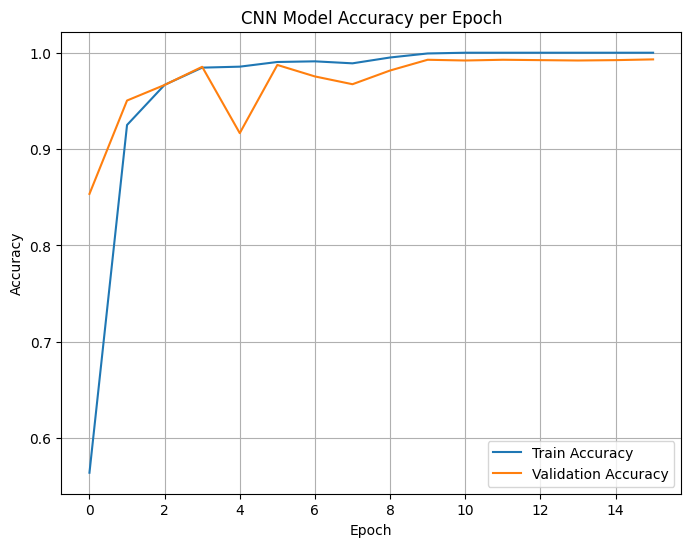

In [17]:
# ===== 5. Evaluate Model =====
test_loss, test_acc = cnn_model.evaluate(test_data)
print(f"\n✅ CNN Test Accuracy: {test_acc:.4f}")

# ===== 6. Predictions & True Labels (FIXED) =====
y_pred = []
y_true = []

for batch_images, batch_labels in test_data:
    preds = cnn_model.predict(batch_images)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(np.argmax(batch_labels.numpy(), axis=1))

# ===== 7. Classification Report =====
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("\n📊 Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# ===== 8. Confusion Matrix =====
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.title("Confusion Matrix - CNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ===== 9. Accuracy Plot =====
plt.figure(figsize=(8, 6))
plt.plot(cnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title("CNN Model Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


In [28]:
# Simpan model dalam format HDF5 (.h5)
cnn_model.save("model_cnn.h5")

In [ ]:
from tensorflow.keras.models import load_model
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os


# Load dari .h5
model = load_model("model_cnn.h5")



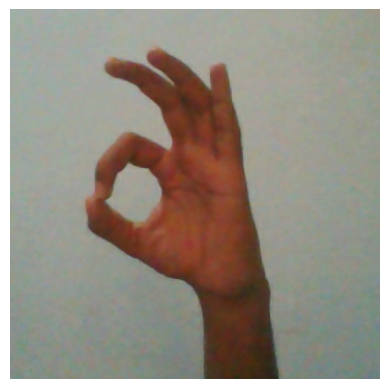

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted class index: 15 (P)
Confidence: 99.36%


In [35]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

# Ganti dengan path folder hasil upload
image_path = '/kaggle/working/SIBI_datasets/test/F/1111.jpg'

# Baca dan tampilkan gambar
img = tf.io.read_file(image_path)
img = tf.image.decode_image(img, channels=3)
plt.imshow(img.numpy().astype("uint8"))
plt.axis('off')
plt.show()

# Resize & tambahkan batch dimensi
img = tf.image.resize(img, [224, 224])  # sesuaikan dengan input model
img_array = tf.expand_dims(img / 255.0, axis=0)  # normalisasi

# Prediksi
pred = model.predict(img_array)
pred_index = np.argmax(pred)
confidence = np.max(pred) * 100

# Tampilkan hasil
print(f"Predicted class index: {pred_index} ({class_names[pred_index]})")
print(f"Confidence: {confidence:.2f}%")


# Model ResNet50

In [11]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.optimizers import Adam

# Load base model
base_resnet = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

# Freeze pretrained layers
base_resnet.trainable = False

# Build custom classifier on top
x = base_resnet.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)
output = layers.Dense(num_classes, activation='softmax')(x)

# Define model
resnet_model = Model(inputs=base_resnet.input, outputs=output, name="ResNet50_Model")

# Compile
resnet_model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, verbose=1)

# Train
resnet_history = resnet_model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    callbacks=[early_stop, reduce_lr]
)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10


I0000 00:00:1748495839.904443     108 service.cc:148] XLA service 0x1e395cf0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1748495839.905569     108 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1748495839.905592     108 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1748495841.576914     108 cuda_dnn.cc:529] Loaded cuDNN version 90300


  2/650 ━━━━━━━━━━━━━━━━━━━━ 52s 81ms/step - accuracy: 0.1172 - loss: 4.2363   

I0000 00:00:1748495847.075839     108 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


650/650 ━━━━━━━━━━━━━━━━━━━━ 94s 117ms/step - accuracy: 0.5470 - loss: 1.7583 - val_accuracy: 0.9965 - val_loss: 0.1021 - learning_rate: 1.0000e-04
Epoch 2/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 59s 90ms/step - accuracy: 0.9668 - loss: 0.2057 - val_accuracy: 0.9988 - val_loss: 0.0318 - learning_rate: 1.0000e-04
Epoch 3/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 61s 93ms/step - accuracy: 0.9843 - loss: 0.0943 - val_accuracy: 0.9996 - val_loss: 0.0153 - learning_rate: 1.0000e-04
Epoch 4/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 60s 92ms/step - accuracy: 0.9916 - loss: 0.0564 - val_accuracy: 0.9996 - val_loss: 0.0090 - learning_rate: 1.0000e-04
Epoch 5/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 60s 92ms/step - accuracy: 0.9941 - loss: 0.0385 - val_accuracy: 0.9996 - val_loss: 0.0062 - learning_rate: 1.0000e-04
Epoch 6/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 60s 93ms/step - accuracy: 0.9954 - loss: 0.0285 - val_accuracy: 0.9996 - val_loss: 0.0049 - learning_rate: 1.0000e-04
Epoch 7/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 60s 92ms/step - accura

In [12]:
# Evaluasi model di data test
test_loss, test_acc = resnet_model.evaluate(test_data)
print(f"Test Accuracy: {test_acc:.4f}")


82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - accuracy: 0.9996 - loss: 9.5405e-04
Test Accuracy: 0.9996


82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - accuracy: 0.9996 - loss: 9.5405e-04

✅ CNN Test Accuracy: 0.9996
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/s

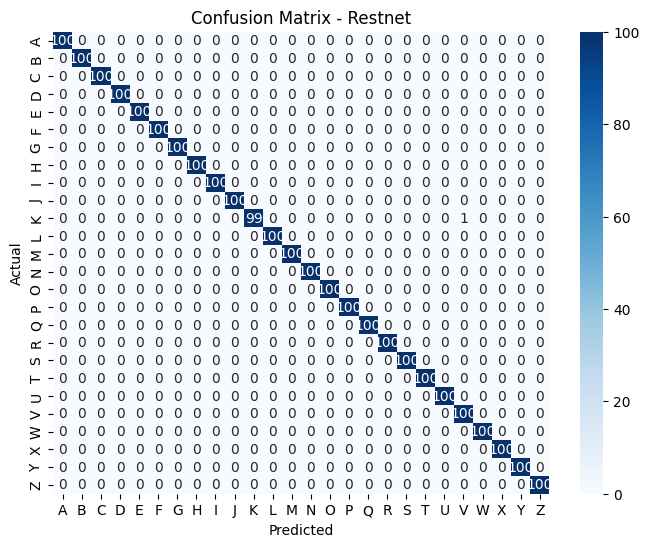

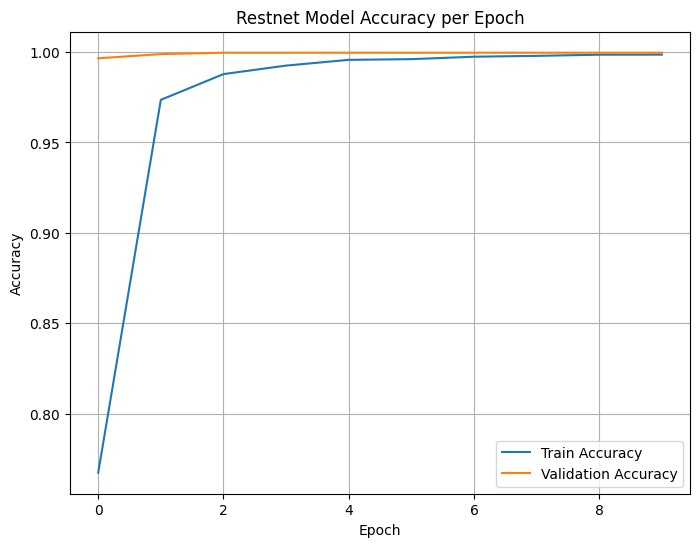

In [17]:
# ===== 5. Evaluate Model =====
test_loss, test_acc = resnet_model.evaluate(test_data)
print(f"\n✅ CNN Test Accuracy: {test_acc:.4f}")

# ===== 6. Predictions & True Labels (FIXED) =====
y_pred = []
y_true = []

for batch_images, batch_labels in test_data:
    preds = resnet_model.predict(batch_images)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(np.argmax(batch_labels.numpy(), axis=1))

# ===== 7. Classification Report =====
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("\n📊 Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# ===== 8. Confusion Matrix =====
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.title("Confusion Matrix - Restnet")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ===== 9. Accuracy Plot =====
plt.figure(figsize=(8, 6))
plt.plot(resnet_history.history['accuracy'], label='Train Accuracy')
plt.plot(resnet_history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Restnet Model Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


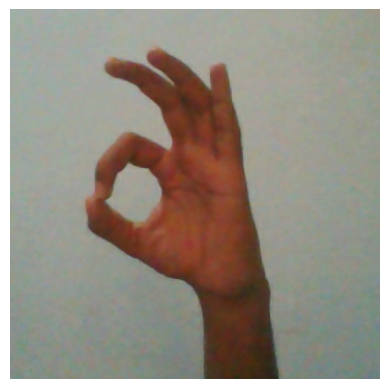

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted class index: 23 (X)
Confidence: 43.07%


In [24]:
from tensorflow.keras.models import load_model
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

# Simpan model dalam format HDF5 (.h5)
resnet_model.save("model_resnet.h5")

# Load dari .h5
model = load_model("model_resnet.h5")

# Ganti dengan path folder hasil upload
image_path = '/kaggle/working/SIBI_datasets/test/F/1111.jpg'

# Baca dan tampilkan gambar
img = tf.io.read_file(image_path)
img = tf.image.decode_image(img, channels=3)
plt.imshow(img.numpy().astype("uint8"))
plt.axis('off')
plt.show()

# Resize & tambahkan batch dimensi
img = tf.image.resize(img, [224, 224])  # sesuaikan dengan input model
img_array = tf.expand_dims(img / 255.0, axis=0)  # normalisasi

# Prediksi
pred = model.predict(img_array)
pred_index = np.argmax(pred)
confidence = np.max(pred) * 100

# Tampilkan hasil
print(f"Predicted class index: {pred_index} ({class_names[pred_index]})")
print(f"Confidence: {confidence:.2f}%")


# Model MobileNetV2

In [18]:
from tensorflow.keras.applications import MobileNetV2

# Base model
base_mobilenet = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_mobilenet.trainable = False

# Head
x = base_mobilenet.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)
output = layers.Dense(num_classes, activation='softmax')(x)

mobilenet_model = Model(inputs=base_mobilenet.input, outputs=output, name="MobileNetV2_Model")

mobilenet_model.compile(optimizer=Adam(learning_rate=0.0001),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

mobilenet_history = mobilenet_model.fit(
    train_data,
    validation_data=val_data,
    epochs=20,
    callbacks=[early_stop, reduce_lr]
)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
650/650 ━━━━━━━━━━━━━━━━━━━━ 38s 39ms/step - accuracy: 0.2422 - loss: 2.7576 - val_accuracy: 0.8223 - val_loss: 1.1473 - learning_rate: 1.0000e-04
Epoch 2/20
650/650 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.6525 - loss: 1.2471 - val_accuracy: 0.9215 - val_loss: 0.5753 - learning_rate: 1.0000e-04
Epoch 3/20
650/650 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.7815 - loss: 0.7928 - val_accuracy: 0.9469 - val_loss: 0.3692 - learning_rate: 1.0000e-04
Epoch 4/20
650/650 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.8517 - loss: 0.5713 - val_accuracy: 0.9565 - val_loss: 0.2608 - learning_rate: 1.0000e-04
Epoch 5/20
650/650 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.8841 - loss: 0.4357 - val_accuracy: 0.9685 - val_loss: 0.1990 - learning_rate: 1.0000e-04
Epoch 6/20
650/650 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.9083 - loss: 0.3523 - val_accuracy: 0.9727 - val_loss: 0.1585 - learning_rate: 1.0000e-04
Epo

82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9910 - loss: 0.0331

✅ CNN Test Accuracy: 0.9915
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

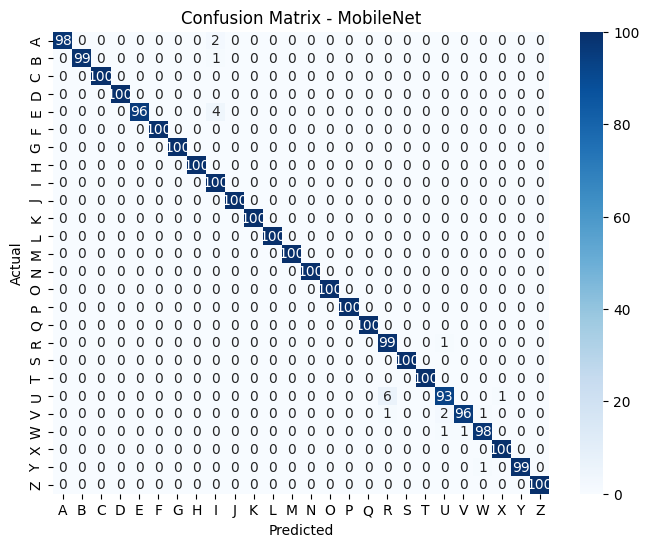

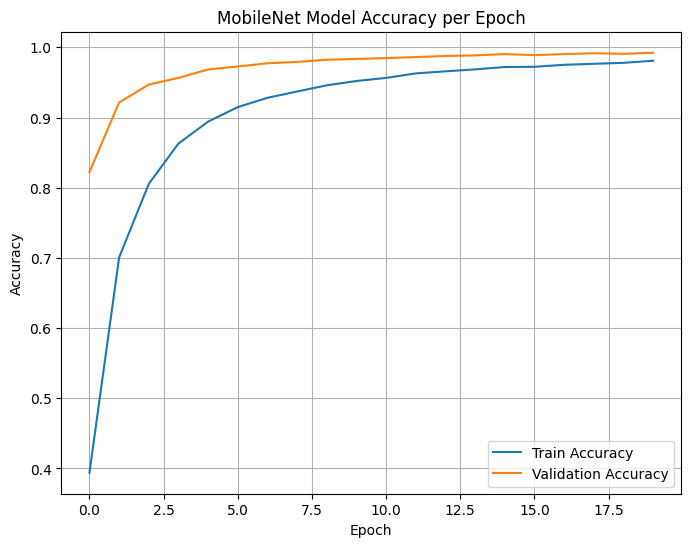

In [19]:
# ===== 5. Evaluate Model =====
test_loss, test_acc = mobilenet_model.evaluate(test_data)
print(f"\n✅ CNN Test Accuracy: {test_acc:.4f}")

# ===== 6. Predictions & True Labels (FIXED) =====
y_pred = []
y_true = []

for batch_images, batch_labels in test_data:
    preds = mobilenet_model.predict(batch_images)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(np.argmax(batch_labels.numpy(), axis=1))

# ===== 7. Classification Report =====
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("\n📊 Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# ===== 8. Confusion Matrix =====
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.title("Confusion Matrix - MobileNet")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ===== 9. Accuracy Plot =====
plt.figure(figsize=(8, 6))
plt.plot(mobilenet_history.history['accuracy'], label='Train Accuracy')
plt.plot(mobilenet_history.history['val_accuracy'], label='Validation Accuracy')
plt.title("MobileNet Model Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


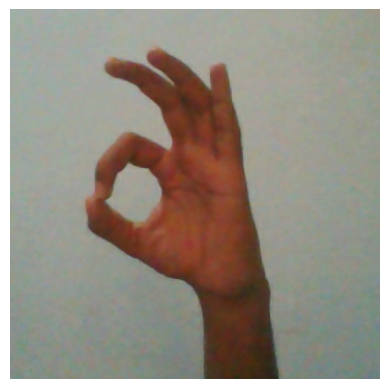

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted class index: 25 (Z)
Confidence: 99.84%


In [27]:
from tensorflow.keras.models import load_model
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

# Simpan model dalam format HDF5 (.h5)
mobilenet_model.save("model_mobilenet.h5")

# Load dari .h5
model = load_model("model_mobilenet.h5")

# Ganti dengan path folder hasil upload
image_path = '/kaggle/working/SIBI_datasets/test/F/1111.jpg'

# Baca dan tampilkan gambar
img = tf.io.read_file(image_path)
img = tf.image.decode_image(img, channels=3)
plt.imshow(img.numpy().astype("uint8"))
plt.axis('off')
plt.show()

# Resize & tambahkan batch dimensi
img = tf.image.resize(img, [224, 224])  # sesuaikan dengan input model
img_array = tf.expand_dims(img / 255.0, axis=0)  # normalisasi

# Prediksi
pred = model.predict(img_array)
pred_index = np.argmax(pred)
confidence = np.max(pred) * 100

# Tampilkan hasil
print(f"Predicted class index: {pred_index} ({class_names[pred_index]})")
print(f"Confidence: {confidence:.2f}%")


# Model DenseNet

In [20]:
from tensorflow.keras.applications import DenseNet121

# Base model
base_densenet = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_densenet.trainable = False

# Head
x = base_densenet.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)
output = layers.Dense(num_classes, activation='softmax')(x)

densenet_model = Model(inputs=base_densenet.input, outputs=output, name="DenseNet121_Model")

densenet_model.compile(optimizer=Adam(learning_rate=0.0001),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

densenet_history = densenet_model.fit(
    train_data,
    validation_data=val_data,
    epochs=20,
    callbacks=[early_stop, reduce_lr]
)


29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
650/650 ━━━━━━━━━━━━━━━━━━━━ 109s 116ms/step - accuracy: 0.0966 - loss: 5.6948 - val_accuracy: 0.4250 - val_loss: 2.1673 - learning_rate: 1.0000e-04
Epoch 2/20
650/650 ━━━━━━━━━━━━━━━━━━━━ 53s 81ms/step - accuracy: 0.3097 - loss: 2.2901 - val_accuracy: 0.7323 - val_loss: 1.4116 - learning_rate: 1.0000e-04
Epoch 3/20
650/650 ━━━━━━━━━━━━━━━━━━━━ 51s 79ms/step - accuracy: 0.4787 - loss: 1.7094 - val_accuracy: 0.8377 - val_loss: 0.9710 - learning_rate: 1.0000e-04
Epoch 4/20
650/650 ━━━━━━━━━━━━━━━━━━━━ 52s 80ms/step - accuracy: 0.5982 - loss: 1.3023 - val_accuracy: 0.8938 - val_loss: 0.6949 - learning_rate: 1.0000e-04
Epoch 5/20
650/650 ━━━━━━━━━━━━━━━━━━━━ 52s 80ms/step - accuracy: 0.6683 - loss: 1.0621 - val_accuracy: 0.9277 - val_loss: 0.5121 - learning_rate: 1.0000e-04
Epoch 6/20
650/650 ━━━━━━━━━━━━━━━━━━━━ 52s 80ms/step - accuracy: 0.7340 - loss: 0.8708 - val_accuracy: 0.9427 - val_loss: 0.3989 - learning_rate: 1.0000e-04

82/82 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - accuracy: 0.9973 - loss: 0.0463

✅ CNN Test Accuracy: 0.9950
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━

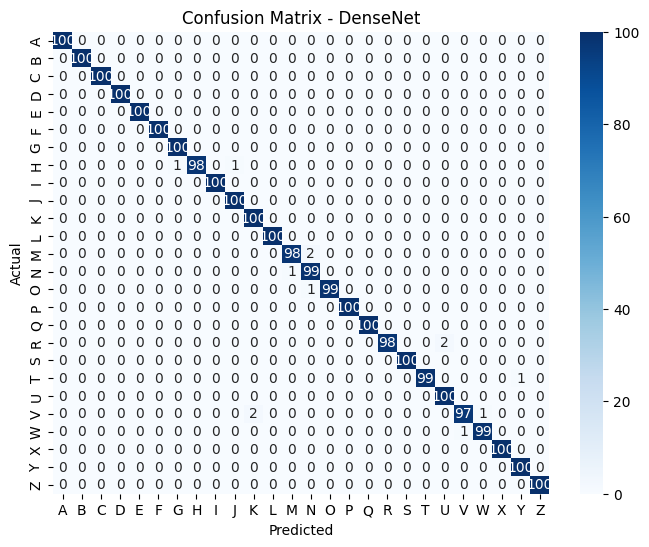

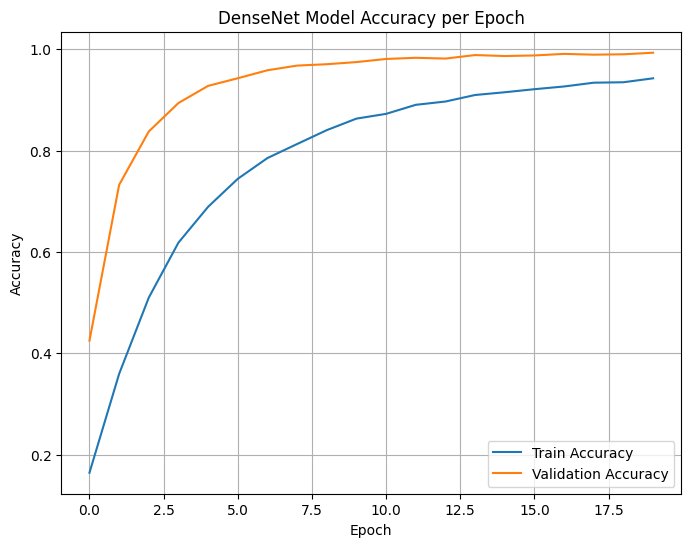

In [22]:
# ===== 5. Evaluate Model =====
test_loss, test_acc = densenet_model.evaluate(test_data)
print(f"\n✅ CNN Test Accuracy: {test_acc:.4f}")

# ===== 6. Predictions & True Labels (FIXED) =====
y_pred = []
y_true = []

for batch_images, batch_labels in test_data:
    preds = densenet_model.predict(batch_images)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(np.argmax(batch_labels.numpy(), axis=1))

# ===== 7. Classification Report =====
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("\n📊 Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# ===== 8. Confusion Matrix =====
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.title("Confusion Matrix - DenseNet")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ===== 9. Accuracy Plot =====
plt.figure(figsize=(8, 6))
plt.plot(densenet_history.history['accuracy'], label='Train Accuracy')
plt.plot(densenet_history.history['val_accuracy'], label='Validation Accuracy')
plt.title("DenseNet Model Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


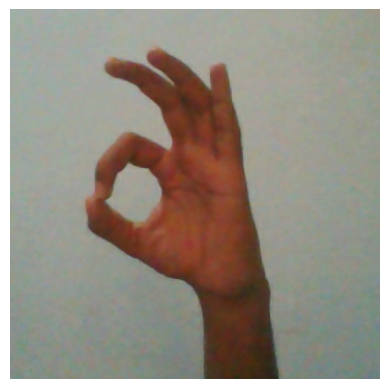

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step
Predicted class index: 12 (M)
Confidence: 78.32%


In [29]:
from tensorflow.keras.models import load_model
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

# Simpan model dalam format HDF5 (.h5)
densenet_model.save("model_densenet.h5")

# Load dari .h5
model = load_model("model_densenet.h5")

# Ganti dengan path folder hasil upload
image_path = '/kaggle/working/SIBI_datasets/test/F/1111.jpg'

# Baca dan tampilkan gambar
img = tf.io.read_file(image_path)
img = tf.image.decode_image(img, channels=3)
plt.imshow(img.numpy().astype("uint8"))
plt.axis('off')
plt.show()

# Resize & tambahkan batch dimensi
img = tf.image.resize(img, [224, 224])  # sesuaikan dengan input model
img_array = tf.expand_dims(img / 255.0, axis=0)  # normalisasi

# Prediksi
pred = model.predict(img_array)
pred_index = np.argmax(pred)
confidence = np.max(pred) * 100

# Tampilkan hasil
print(f"Predicted class index: {pred_index} ({class_names[pred_index]})")
print(f"Confidence: {confidence:.2f}%")
